<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/Transfer%20Learning%20(Bert%2C%20T5%2C%20LLaMa%2C%20etc..%20(transformers)/Sentiment%20Analysis/Sentiment_Analysis_using_Vaders_and_Roberta_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

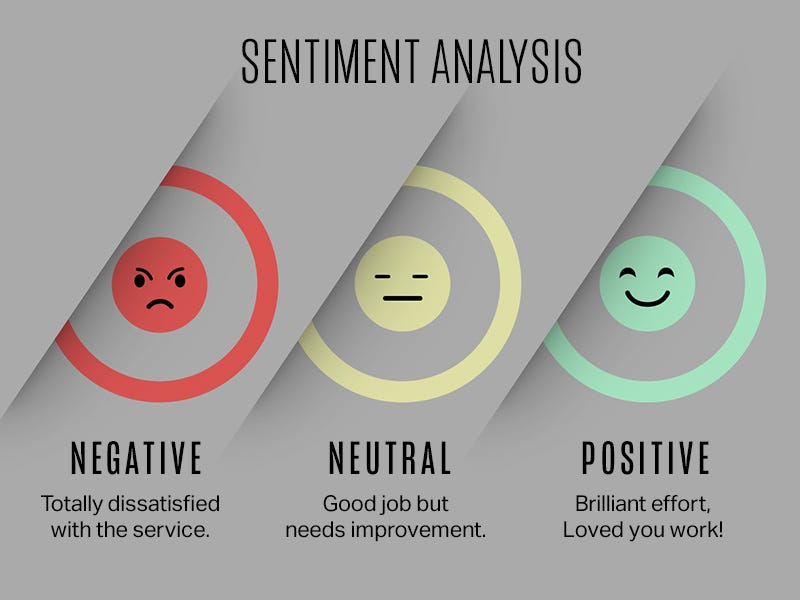
#**Project Summary: Sentiment Analysis on Disneyland Reviews  Using VADER and Roberta Pre-trained model**

##**Overview**

This project applies the VADER and Roberta to classify customer feedback from the Disneyland Reviews dataset (Kaggle). After preprocessing the review text, both VADER and Roberta effectively categorized each review into positive, neutral, or negative sentiment, capturing both polarity and intensity with strong consistency and interpretability.


---

#**Aim of the Project**

To analyze customer opinions and detect sentiment patterns without the need for heavy model training.

To demonstrate how VADER and Roberta can deliver fast, actionable sentiment insights from large review datasets.

##**Importing Libraries**

In [ ]:
import transformers
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
import nltk

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DisneylandReviews.csv", encoding="latin1")
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


##**Load Dataset from Google drive**

##**Data cleaning: Confirming to know if there is null and duplicate values**

In [ ]:
print(f"Columns with num values on dataset: {df.isna().sum()}")
print("\n")
print(f"Columns with duplicate values on dataset: {df.duplicated().sum()}")

Columns with num values on dataset: Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


Columns with duplicate values on dataset: 12


In [ ]:
df = df[:4000]

##**Viewing number of counts for each Rating**

In [ ]:
df.Rating.value_counts()

,count
Rating,
5,1993
4,1285
3,532
2,132
1,58


##**Bar_Chart Representation**

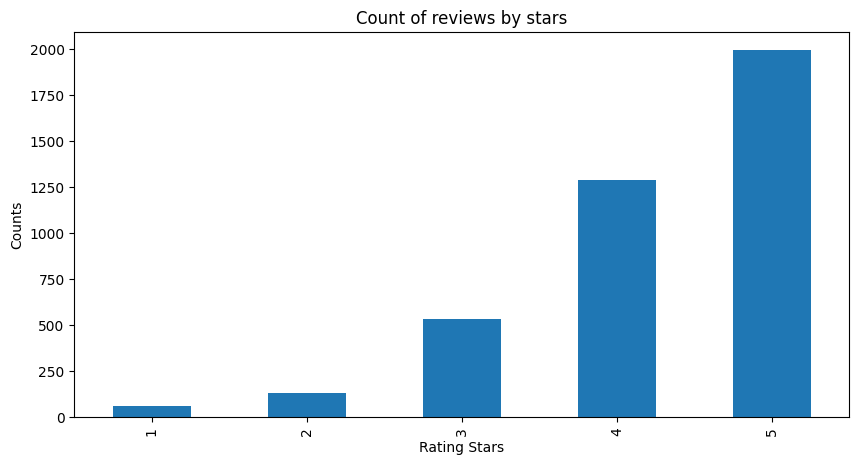

In [ ]:
df.Rating.value_counts().sort_index() \
.plot(kind="bar", title= "Count of reviews by stars", figsize=(10,5))
plt.xlabel("Rating Stars")
plt.ylabel("Counts")
plt.show()

##**Creating example from my dataset**

In [ ]:
example = df['Review_Text'][60]
example

'Went for day xx brilliant food x was holiday day for local people so very busy buy so polite .. had a great time'

##**Preparing sentiment model from nltk to analyze text into category**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


##**Testing polarity score on example**

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.891}

##**Running Sia model on my main Text data's iterating through all**.
 Progress bar was used to monitor progress.

In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row["Review_Text"]
  ids = row["Review_ID"]
  res[ids] = sia.polarity_scores(text)

  0%|          | 0/4000 [00:00<?, ?it/s]

##**Merging varders result with dataframe**

In [ ]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.merge(df, left_index=True, right_on='Review_ID', how="left")
Vaders

,neg,neu,pos,compound,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0.000,0.887,0.113,0.7069,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,0.040,0.730,0.231,0.9901,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,0.024,0.742,0.235,0.9920,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,0.080,0.760,0.160,0.8489,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,0.000,0.899,0.101,0.2846,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...
3995,0.078,0.922,0.000,-0.5096,382335983,3,2016-6,Australia,With what I would class as only 2 major rides ...,Disneyland_HongKong
3996,0.000,0.514,0.486,0.9514,382314659,5,2016-6,Australia,Great day out . Easy to get to via train .staf...,Disneyland_HongKong
3997,0.000,0.839,0.161,0.8873,382184939,5,2016-6,United Kingdom,As Disney fans we had to go to Hong Kong Disne...,Disneyland_HongKong
3998,0.051,0.813,0.136,0.8713,382161990,4,2016-6,Singapore,The park is overall very nice...The toilet are...,Disneyland_HongKong


##**Bar_chart of what Vaders compound represents**

/tmp/ipython-input-313309233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="compound", palette="viridis")


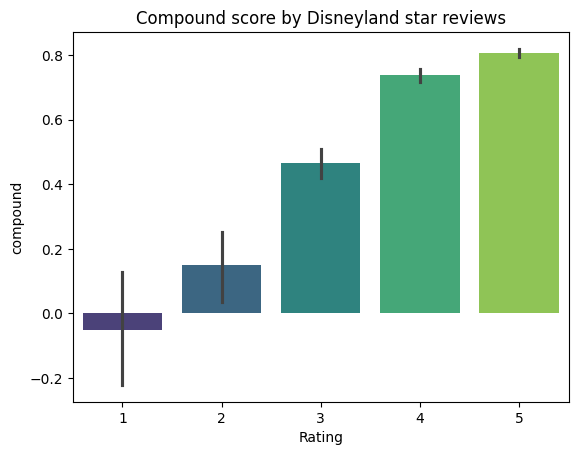



What this Means
Negative reviews has low compound score (eg: Rating 1,2,3) 
 And Positive reviews has high compound score(eg. Rating 4,5)




In [ ]:
sns.barplot(data=Vaders, x="Rating", y="compound", palette="viridis")
plt.title("Compound score by Disneyland star reviews")
plt.show()
print("\n")
print("What this Means")
print("Negative reviews has low compound score (eg: Rating 1,2,3) \n And Positive reviews has high compound score(eg. Rating 4,5)")
print("\n")

##**Visualizing them by negative, neutral and positive reviews**

/tmp/ipython-input-201187859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
/tmp/ipython-input-201187859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
/tmp/ipython-input-201187859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")


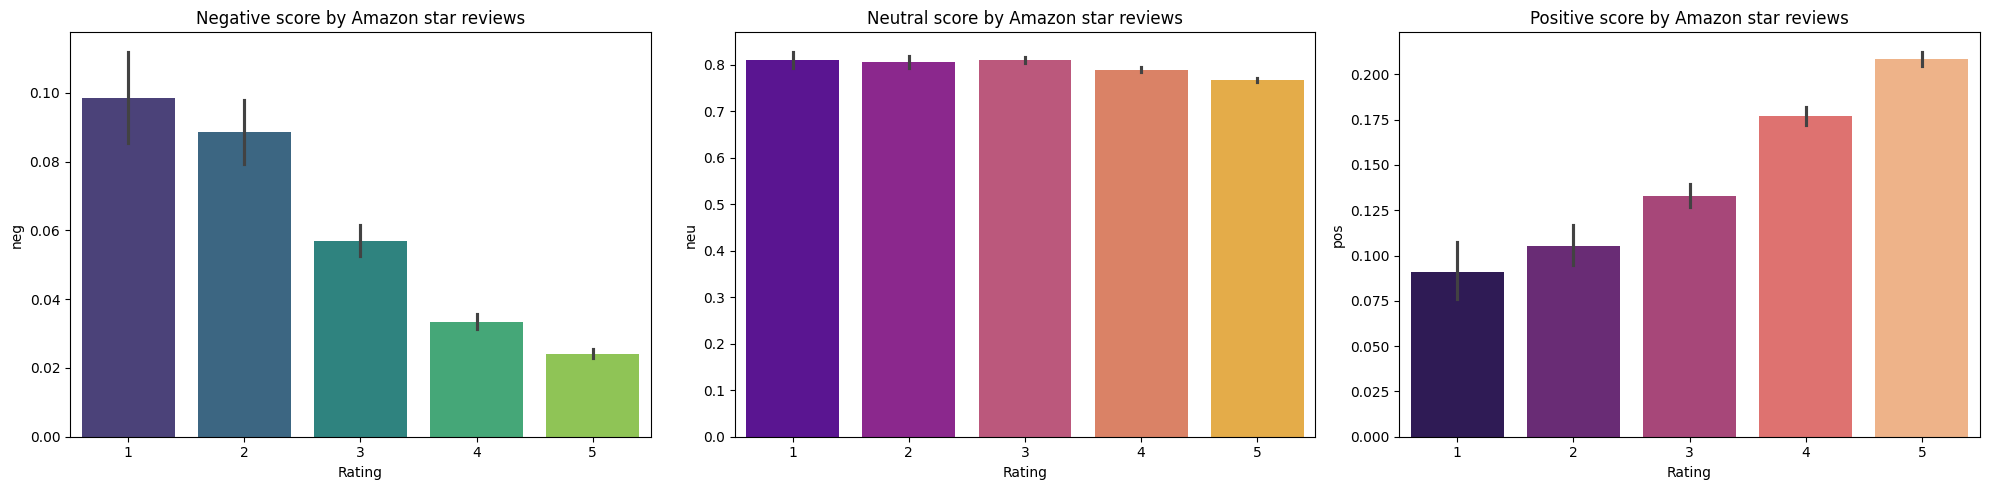

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(data=Vaders, x="Rating", y="neg", ax = axs[0], palette="viridis")
sns.barplot(data=Vaders, x="Rating", y="neu", ax = axs[1], palette="plasma")
sns.barplot(data=Vaders, x="Rating", y="pos", ax = axs[2], palette="magma")
axs[0].set_title("Negative score by Amazon star reviews")
axs[1].set_title("Neutral score by Amazon star reviews")
axs[2].set_title("Positive score by Amazon star reviews")
plt.tight_layout()
plt.show()

##**As you can see Negative goes downwards, neural try to maintain its level while positive goes upward**

##**Result:** Take note Scores grater than 0.5 are positive and scores below 0.5 are either neutral or negative reviews 👍

In [ ]:
Vaders_result = Vaders[["compound", "Rating", "Review_Text"]]
print(Vaders_result)

      compound  Rating                                        Review_Text
0       0.7069       4  If you've ever been to Disneyland anywhere you...
1       0.9901       4  Its been a while since d last time we visit HK...
2       0.9920       4  Thanks God it wasn   t too hot or too humid wh...
3       0.8489       4  HK Disneyland is a great compact park. Unfortu...
4       0.2846       4  the location is not in the city, took around 1...
...        ...     ...                                                ...
3995   -0.5096       3  With what I would class as only 2 major rides ...
3996    0.9514       5  Great day out . Easy to get to via train .staf...
3997    0.8873       5  As Disney fans we had to go to Hong Kong Disne...
3998    0.8713       4  The park is overall very nice...The toilet are...
3999    0.1027       5  Good place for family visits. Long walks and m...

[4000 rows x 3 columns]


##**Using Roberta Pre-trained model**

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

##**Implementing pre-trained model into model and tokenizer**

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
df = df[:100]

In [ ]:
from scipy.special import softmax
import torch

def roberta_score(example):
  input = tokenizer(example, truncation=True, padding=True, max_length=512, return_tensors="pt")
  with torch.no_grad():
    output = model(**input)
  output = output[0][0].detach().numpy()
  score = softmax(output)

  rob_dict = {"Roberta_neg": score[0],
              "Roberta_neu": score[1],
              "Roberta_pos": score[2],
              }

  return rob_dict

##**Comparing both Sia and Roberta Pre-trained model performance on my example.**

polarity_score👇

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.891}

Roberta score👇

In [ ]:
roberta_score(example)

{'Roberta_neg': np.float32(0.00499575),
 'Roberta_neu': np.float32(0.015521093),
 'Roberta_pos': np.float32(0.9794831)}

##**As we see from above both model are positive but Roberta Pre-trained got a high confidence**

##**Running Roberta model on my df iterating through all text reviews**.

In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row["Review_Text"]
  ids = row["Review_ID"]
  res[ids] = roberta_score(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
roberta = pd.DataFrame(res).T
roberta = roberta.merge(df, left_index=True, right_on='Review_ID', how="left")
roberta.head()

,Roberta_neg,Roberta_neu,Roberta_pos,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0.002539,0.017600,0.979861,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,0.004776,0.043047,0.952177,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,0.063632,0.262983,0.673385,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,0.113487,0.299454,0.587059,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,0.163676,0.457387,0.378937,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


#**Conclusion**

When deployed, this sentiment analysis system can:

Automatically score customer reviews and label their sentiment in real time.

Support e-commerce platforms, product analytics dashboards, and customer feedback systems.

Help businesses monitor brand perception, detect dissatisfaction, and understand user experiences at scale.


The project highlights VADER as a lightweight but powerful tool for sentiment interpretation in real-world review data.
